<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/04_PROJ_GAMES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_base/PS4_GamesSales.csv', encoding = 'latin1')

In [3]:
df.shape

(1034, 9)

In [4]:
# top 10 games mais vendidos
df.sort_values( by = 'Global', ascending= False ).head(10)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


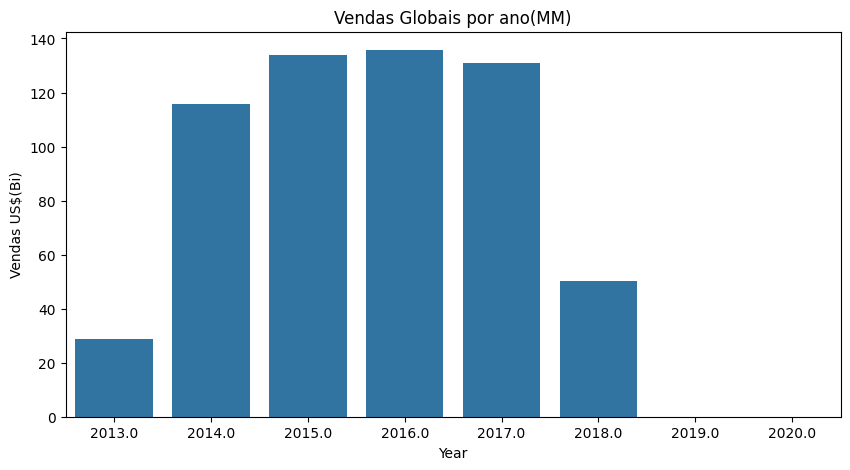

In [5]:
# Observando o comportamento das vendas globais ao longo dos anos
plt.figure( figsize = (10, 5) )
plt.title('Vendas Globais por ano(MM)')
sns.barplot( data = df, x = 'Year', y = 'Global', errorbar = None, estimator = sum)
plt.ylabel('Vendas US$(Bi)');

In [6]:
# retirando os anos de 2019 e 2020
df_clean = df.loc[ ( df['Year'] != 2019 ) & ( df['Year'] != 2020 ) ]
df_clean

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


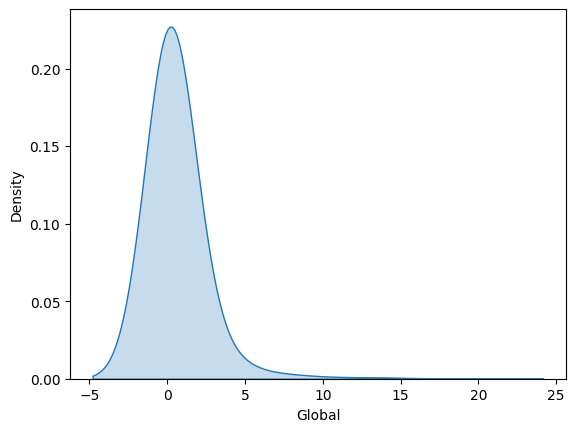

In [7]:
sns.kdeplot( df_clean['Global'], fill= True, bw_method= 1);

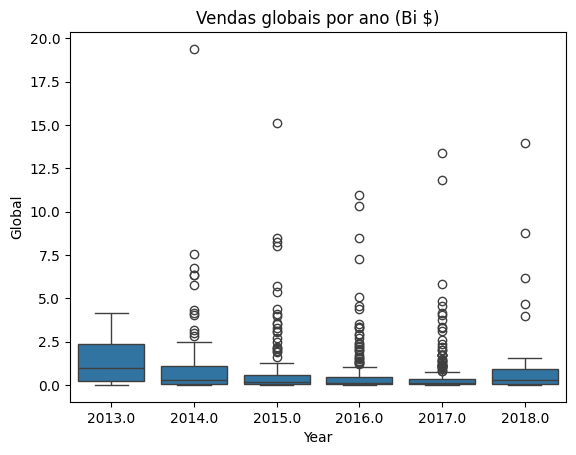

In [8]:
plt.title( 'Vendas globais por ano (Bi $)' )
sns.boxplot( data = df_clean, x = 'Year', y = 'Global');

In [9]:
# retirando valores que estão zerados em vendas para não fdar erro de " float division by zero" na hora dos calculos
df_clean = df_clean[df_clean['Global'] != 0]

In [10]:
df_clean

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
707,Hyper Light Drifter,2017.0,Role-Playing,Active Gaming Media,0.00,0.00,0.01,0.00,0.01
708,Teslagrad,2014.0,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01
709,Darius Burst: Chronicle Saviours,2017.0,Action,Kadokawa Games,0.00,0.00,0.01,0.00,0.01
710,The Escapists: The Walking Dead,2016.0,Action,Team17 Software,0.00,0.00,0.00,0.00,0.01


In [20]:
# Agrupando valores para análise
Analise = df_clean[['Year', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global']].groupby('Year').sum().reset_index()
Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [21]:
# calculando a proposrção de vendas por continente

America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europe = [ Europe / Total * 100 for Europe, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japan = [ Japan / Total * 100 for Japan, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

Realizando um gráfico de barras empilhadas com  base nos calculos da tabela agrupada
- teal
- coral
- lightgray
- gold

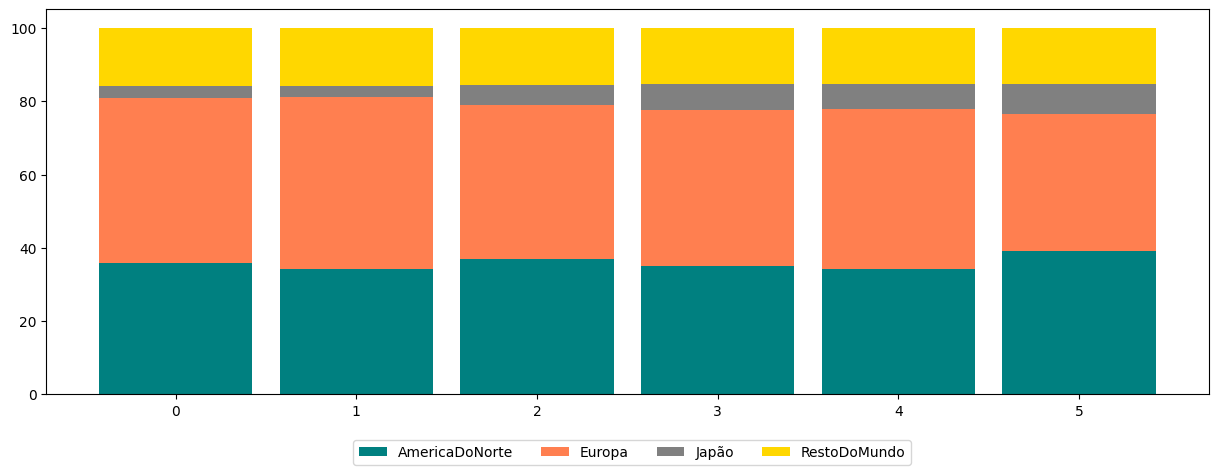

In [71]:
#tamanho

plt.figure( figsize = (15, 5) )

#largura barra grafico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0,1,2,3,4,5]

#Plot da america
plt.bar(Grupos, America, width = Largura_Barra, color = 'teal')

# Plot da Europa
plt.bar(Grupos, Europe, bottom = America, width = Largura_Barra, color = 'coral')

#Plot Japão
plt.bar(Grupos, Japan, bottom = [A + B for A,B in zip(America, Europe)], width = Largura_Barra, color = 'gray')

#Plot resto do mundo
plt.bar(Grupos, Mundo, bottom = [A + B + C for A,B,C in zip(America, Europe, Japan)], width = Largura_Barra, color = 'gold')

plt.legend(['AmericaDoNorte', 'Europa', 'Japão', 'RestoDoMundo'], bbox_to_anchor = (0.75, -0.1), ncols = 4);

In [ ]:
}pink